<a href="https://colab.research.google.com/github/Mandar-ai/Bank-Marketing-Classification/blob/main/Bank_Marketing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4521 non-null   int64 
 1   age         4521 non-null   int64 
 2   job         4521 non-null   object
 3   marital     4521 non-null   object
 4   education   4521 non-null   object
 5   default     4521 non-null   object
 6   balance     4521 non-null   int64 
 7   housing     4521 non-null   object
 8   loan        4521 non-null   object
 9   contact     4521 non-null   object
 10  day         4521 non-null   int64 
 11  month       4521 non-null   object
 12  duration    4521 non-null   int64 
 13  campaign    4521 non-null   int64 
 14  pdays       4521 non-null   int64 
 15  previous    4521 non-null   int64 
 16  poutcome    4521 non-null   object
 17  y           4521 non-null   object
dtypes: int64(8), object(10)
memory usage: 635.9+ KB
None
   Unnamed: 0  age          job  ma

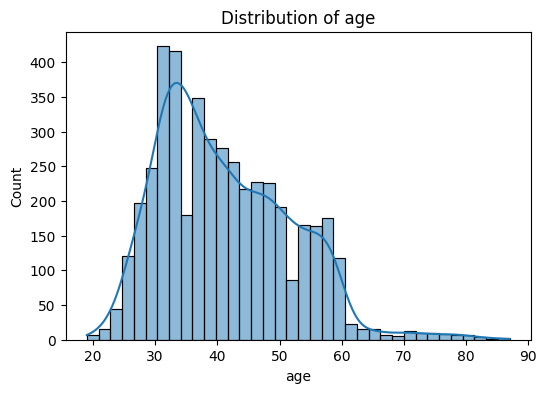

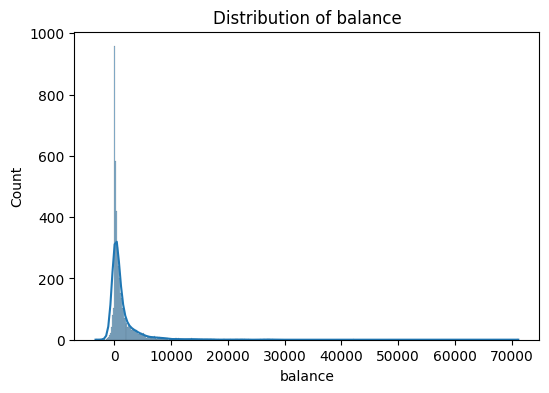

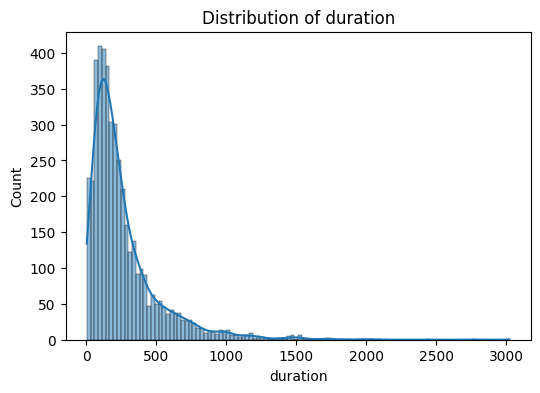

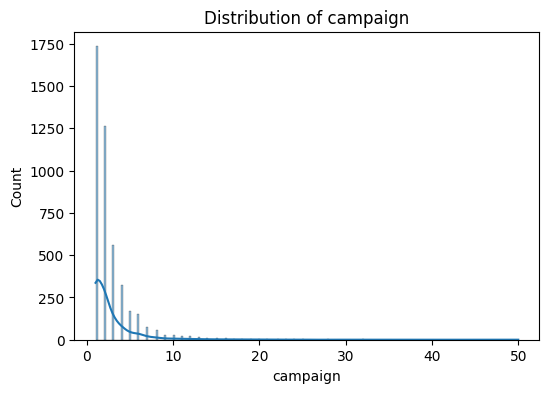

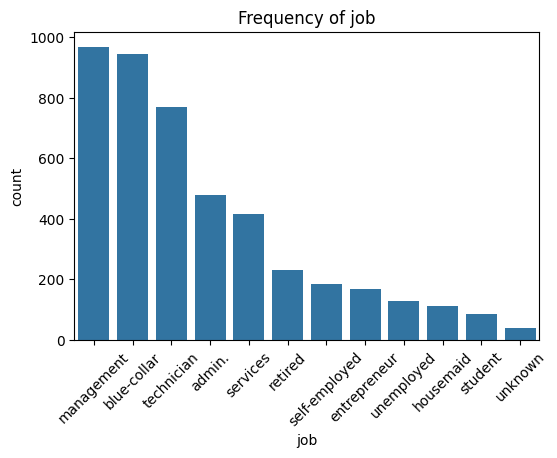

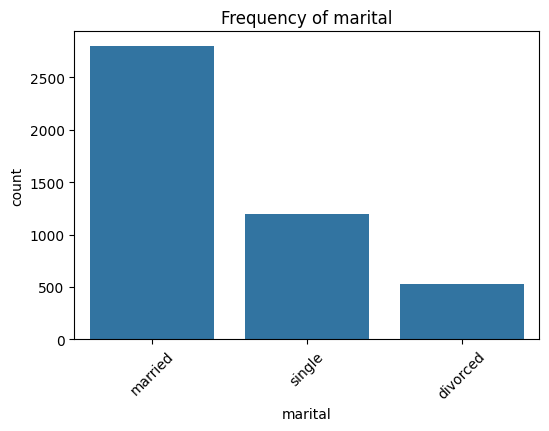

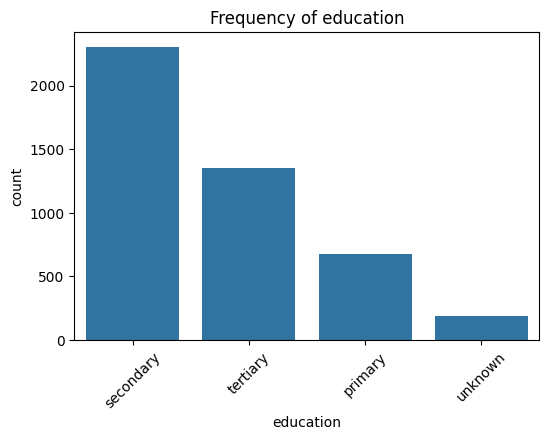

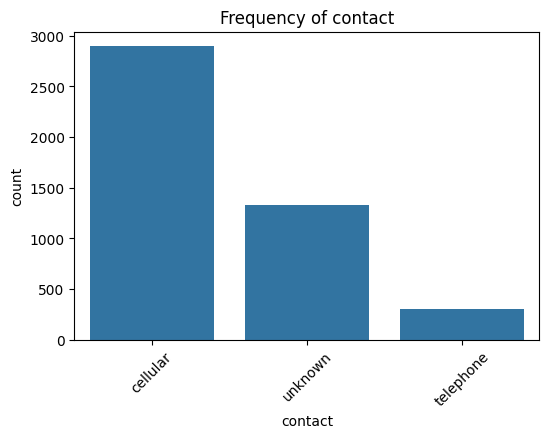

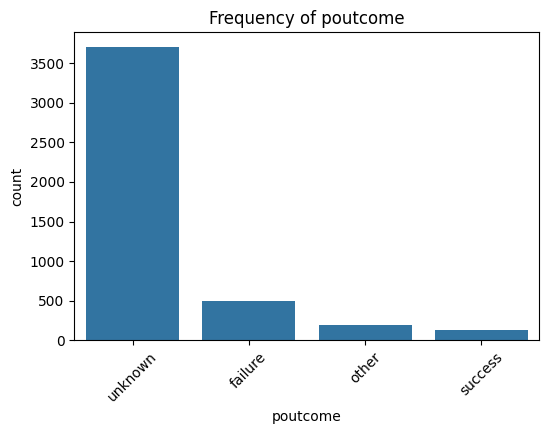

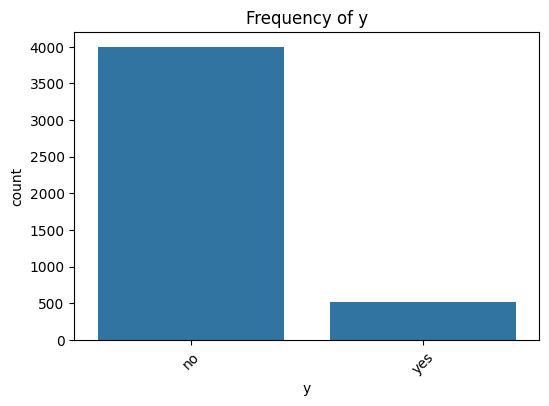

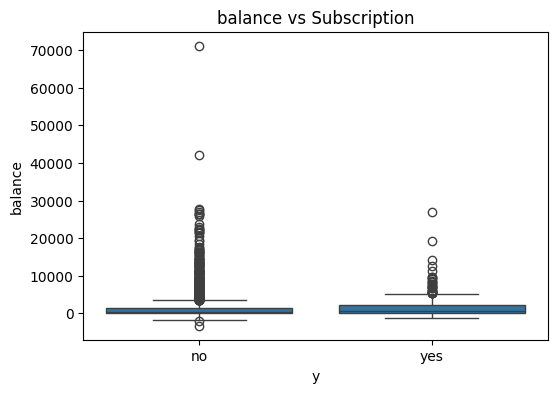

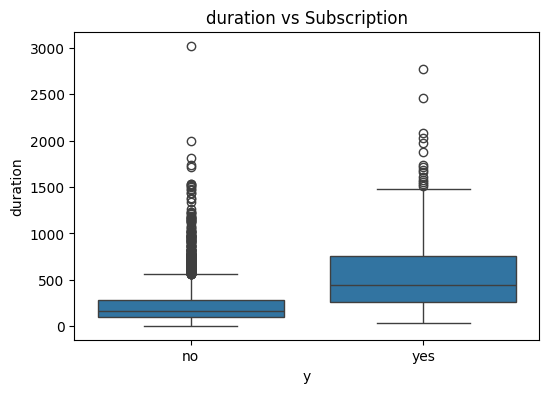

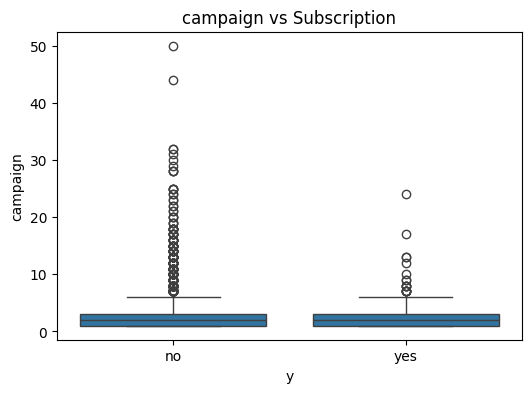

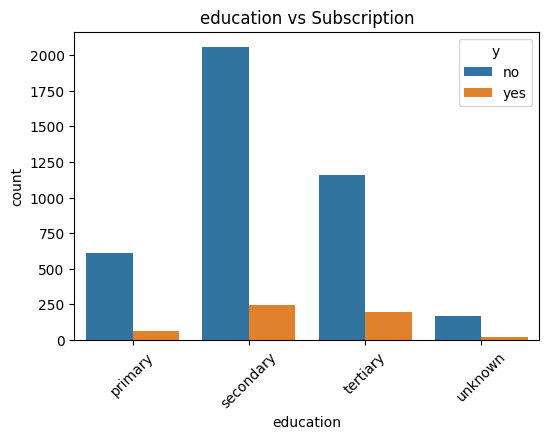

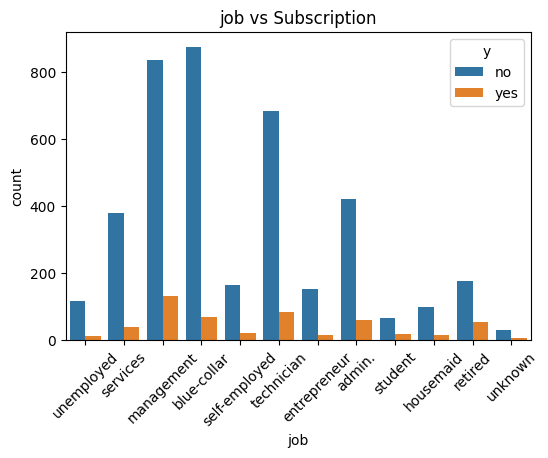

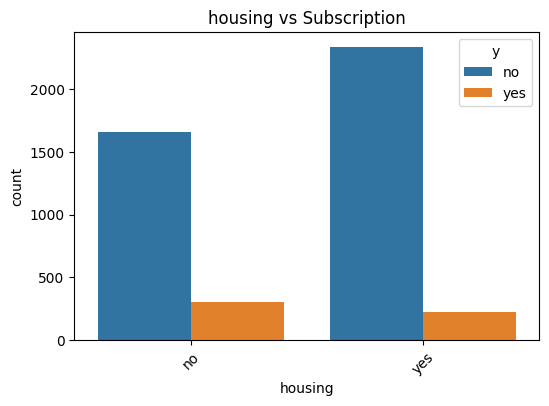

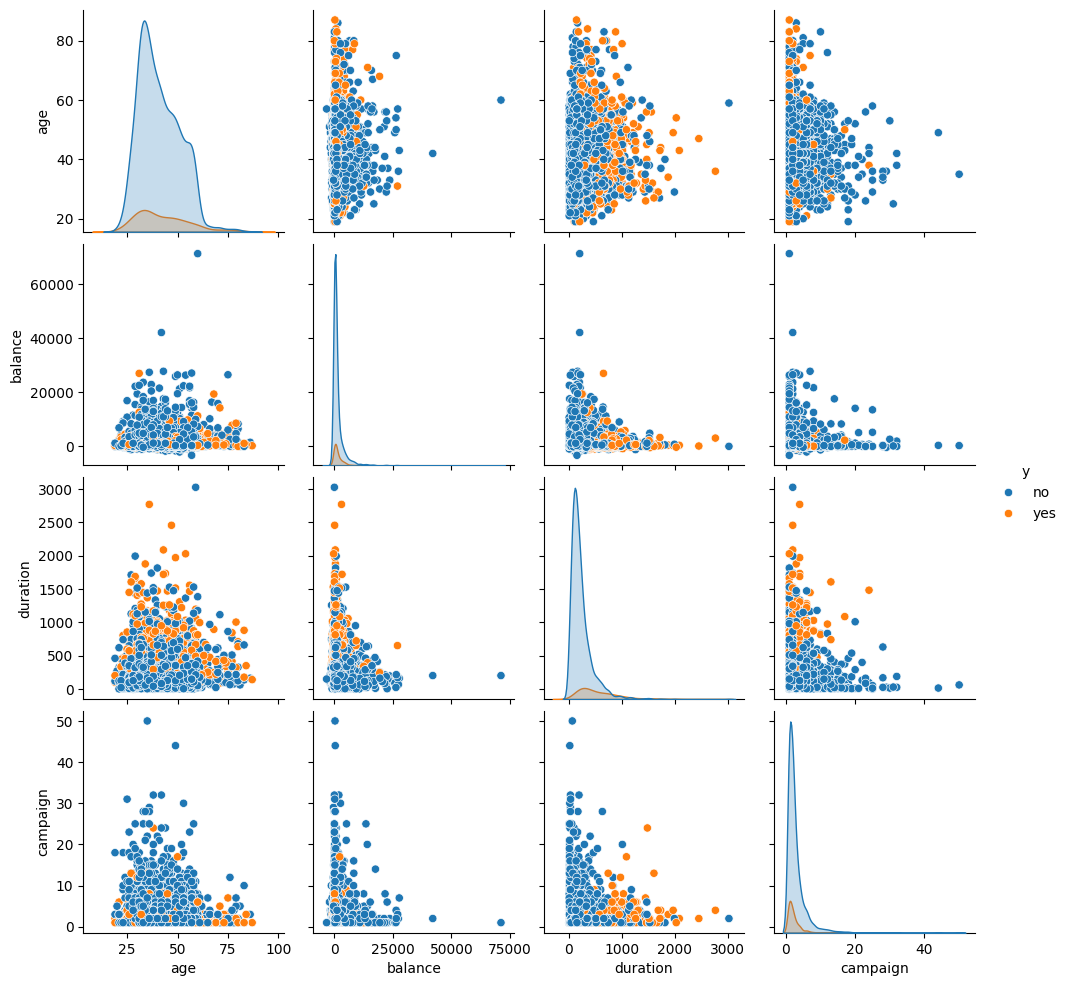

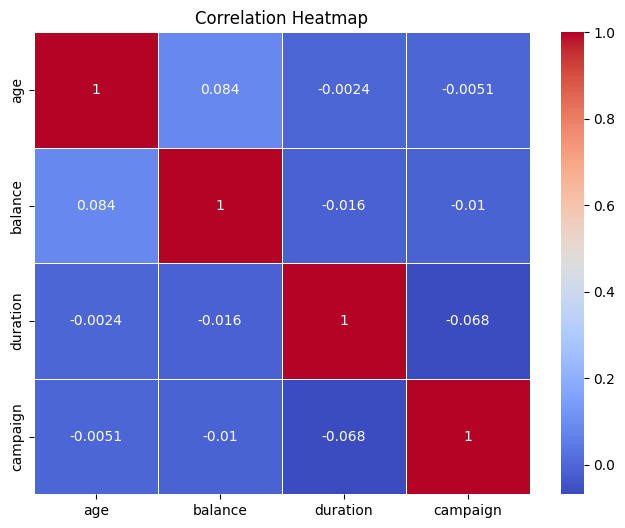

Missing Values:
 Unnamed: 0       0
age              0
job             38
marital          0
education      187
default          0
balance          0
housing          0
loan             0
contact       1324
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome      3705
y                0
dtype: int64


<ipython-input-8-76e2996ee80e>:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-8-76e2996ee80e>:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Preprocessing Complete. Dataset saved as 'preprocessed_bank_data.csv'


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("bank_data.csv")

# Display basic info
print(df.info())
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)
## Univariate Analysis
numeric_features = ['age', 'balance', 'duration', 'campaign']
categorical_features = ['job', 'marital', 'education', 'contact', 'poutcome', 'y']

# Histograms for numerical features
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis
# Box plots
for col in ['balance', 'duration', 'campaign']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Subscription')
    plt.show()

# Bar plots for categorical variables
for col in ['education', 'job', 'housing']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.show()

## Multivariate Analysis
# Pairplot
sns.pairplot(df[numeric_features + ['y']], hue='y')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Data Preprocessing
## Handling Missing/Unknown Values
df.replace('unknown', np.nan, inplace=True)
missing_counts = df.isna().sum()
print("Missing Values:\n", missing_counts)

# Impute categorical missing values with mode
for col in categorical_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute numerical missing values with median
for col in numeric_features:
    df[col].fillna(df[col].median(), inplace=True)

## Encoding Categorical Features
encoder = OneHotEncoder(drop='first', sparse_output=False) # Changed 'sparse' to 'sparse_output'
categorical_encoded = encoder.fit_transform(df[categorical_features])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate with original dataframe
df = df.drop(columns=categorical_features)
df = pd.concat([df, categorical_encoded_df], axis=1)

## Feature Scaling
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

## Derived Features
df['contact_rate'] = df['campaign'] / (df['duration'] + 1)  # Avoid division by zero
df['new_client'] = (df['pdays'] == -1).astype(int)

# Save preprocessed dataset
df.to_csv('preprocessed_bank_data.csv', index=False)
print("Preprocessing Complete. Dataset saved as 'preprocessed_bank_data.csv'")
